In [ ]:
# this file find weights for 5x5, 7x7, 9x9 non-binary patterns
# chemical naming: AHL is the same as OC6, CHL is the same as OHC14

In [1]:
from numpy.random import RandomState
import numpy as np
np.set_printoptions(precision=2,suppress=True)

import matplotlib.pyplot as plt
import scipy.optimize as opt
from math import *

from scipy.optimize import basinhopping,minimize,differential_evolution
from scipy.stats import moment

In [2]:
# basis functions, phi_pos, phi_neg
def transf_pos(x,K=2.0,y0=0.001,ym=1.5,n=2):
    result=ym*((x/K)**n)/(1+(x/K)**n)+ym*y0
    return result

def transf_neg(x,K=2.0,y0=0.001,ym=1.5,n=2):
    result=ym/(1+(x/K)**n)+y0*ym
    return result

In [3]:
def noisy(vector):
    result=[]
    for i in range(0,len(vector)):
        v=vector.copy()
        v[i]=np.logical_not(vector[i]).astype(int)
        #print(i,vector[i],v[i])
        result.append(v)
    return result

In [4]:
def noisy(vector):
    result=[]
    for i in range(0,len(vector)):
        v=vector.copy()
        v[i]=np.logical_not(vector[i]).astype(int)
        #print(i,vector[i],v[i])
        result.append(v)
    return result

In [5]:
zv_5x5=[1,1,1,0,0,\
        0,0,1,0,0,\
        0,0,1,0,0,\
        0,0,1,0,0,\
        0,0,1,1,1]

zv_7x7=[1,1,1,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,1,1,1]

zv_9x9=[1,1,1,1,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,1,1,1,1]    

In [6]:
vv_5x5=[1,0,0,0,1,\
        1,0,0,0,1,\
        1,0,0,0,1,\
        0,1,0,1,0,\
        0,0,1,0,0]

vv_7x7=[1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        0,1,0,0,0,1,0,\
        0,0,1,0,1,0,0,\
        0,0,0,1,0,0,0]

vv_9x9=[1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        0,1,0,0,0,0,0,1,0,\
        0,0,1,0,0,0,1,0,0,\
        0,0,0,1,0,1,0,0,0,\
        0,0,0,0,1,0,0,0,0]    

In [7]:
nv_5x5=[0,0,0,0,0,\
        0,1,1,1,0,\
        1,0,0,0,1,\
        1,0,0,0,1,\
        1,0,0,0,1]

nv_7x7=[0,0,0,0,0,0,0,\
        0,0,0,0,0,0,0,\
        0,1,1,1,1,1,0,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1]

nv_9x9=[0,0,0,0,0,0,0,0,0,\
        0,0,0,0,0,0,0,0,0,\
        0,0,1,1,1,1,1,0,0,\
        0,1,0,0,0,0,0,1,0,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1]

In [8]:
# 5x5
zpatterns=([zv_5x5]+noisy(zv_5x5))
vpatterns=([vv_5x5]+noisy(vv_5x5))
npatterns=([nv_5x5]+noisy(nv_5x5))

patterns_5x5=zpatterns+vpatterns+npatterns

#--------
# 7x7
zpatterns=([zv_7x7]+noisy(zv_7x7))
vpatterns=([vv_7x7]+noisy(vv_7x7))
npatterns=([nv_7x7]+noisy(nv_7x7))

patterns_7x7=zpatterns+vpatterns+npatterns

#--------
# 9x9
zpatterns=([zv_9x9]+noisy(zv_9x9))
vpatterns=([vv_9x9]+noisy(vv_9x9))
npatterns=([nv_9x9]+noisy(nv_9x9))

patterns_9x9=zpatterns+vpatterns+npatterns

In [34]:
# define graded patterns modulated by random sequence
# this is the only section that differs from the code for binary patterns
# for 5x5 patters, size=25, patterns=patterns_5x5
# for 7x7 patters, size=49, patterns=patterns_7x7
# for 9x9 patters, size=81, patterns=patterns_9x9

size=81
patterns=patterns_9x9

rnd_state=RandomState(1)
rand_seq=0.6*rnd_state.random_sample(size)+0.4
print('rand_seq: ',rand_seq)

target_L=0.0
target_H=1.2
lenth=int(len(patterns)/3)

target_0=np.array([target_H]*lenth+[target_L]*lenth+[target_L]*lenth)
target_1=np.array([target_L]*lenth+[target_H]*lenth+[target_L]*lenth)
target_2=np.array([target_L]*lenth+[target_L]*lenth+[target_H]*lenth)

#==============
AHL_unit_level=30   # 30x diuute
transf_p=np.zeros(2)
transf_n=np.zeros(2)

transf_p[0]=transf_pos(x=0,K=50,y0=0.1,ym=1.0,n=0.45)
transf_p[1]=transf_pos(x=AHL_unit_level,K=50,y0=0.1,ym=1.0,n=0.45)
transf_n[0]=transf_neg(x=0,K=0.252,y0=0.341,ym=735,n=0.67)
transf_n[1]=transf_neg(x=AHL_unit_level,K=0.252,y0=0.341,ym=735,n=0.67)
  
print(transf_p)
print(transf_n)

phi_pos=np.array([transf_p]*size)
phi_neg=np.array([transf_n]*size)

phi_pos_ct=np.zeros(shape=phi_pos.shape)
phi_neg_ct=np.zeros(shape=phi_neg.shape)

phi_pos_ct.T[0]=phi_pos.T[0]
phi_pos_ct.T[1]=phi_pos.T[1]*rand_seq

phi_neg_ct.T[0]=phi_neg.T[0]
phi_neg_ct.T[1]=phi_neg.T[1]*(2-rand_seq)

rand_seq:  [0.65 0.83 0.4  0.58 0.49 0.46 0.51 0.61 0.64 0.72 0.65 0.81 0.52 0.93
 0.42 0.8  0.65 0.74 0.48 0.52 0.88 0.98 0.59 0.82 0.93 0.94 0.45 0.42
 0.5  0.93 0.46 0.65 0.97 0.72 0.82 0.59 0.81 0.9  0.41 0.85 0.99 0.85
 0.57 0.87 0.46 0.67 0.95 0.58 0.57 0.48 0.41 0.81 0.53 0.56 0.69 0.43
 0.74 0.49 0.75 0.82 0.46 0.65 0.82 0.65 0.43 0.72 0.8  0.71 0.97 0.75
 0.94 0.48 0.48 0.88 0.64 0.5  0.96 0.61 0.85 0.84 0.93]
[0.1  0.54]
[985.63 279.36]


In [35]:
# same functions as for binary patterns
def examine_output(w,P,phi_pos,phi_neg):
    y_n=np.zeros(len(P))
    w_ph_=np.zeros(len(P))
    
    for n in range(0,len(P)):
        pttn=np.array(P[n])
        
        phi_nw=(1.0+w/np.sqrt(w**2))/2*output_fcn(pttn,phi_pos)+\
            (1.0-w/np.sqrt(w**2))/2*output_fcn(pttn,phi_neg)/w
                
        w_ph_[n]=np.dot(w,phi_nw)/len(w)
        y_n[n]=activate(w_ph_[n])
        
    return y_n,w_ph_

def output_fcn(pttn,fcn):
    CHL_levels=np.zeros(len(pttn))
    for i in range(0,len(pttn)):
        CHL_levels[i]=fcn[i][pttn[i]]
        
    return CHL_levels

def activate(x):
    K,y0,ym_x,n= 1.10292919e+03,1.94584842e-02,2.15950963e+04,2.33038211e+00

    result=transf_pos(x.sum(),K=K,y0=y0/1e4,ym=2.0,n=n).sum()
    return result

In [36]:
def train_step1_ct(target,size,eta,phi_pos,phi_neg):
    rndstate=RandomState(2)
    w=rndstate.random_sample(size)
    r=size

    w_series=[]
    y_series=[]
    delta_series=[]

    for it in range(0,350):
        y_n=np.zeros(len(patterns))
        g_n=np.zeros(len(patterns))
        delta_err=np.zeros(size)
        phi_n=[]
    
        for n in range(0,len(patterns)):
            pttn=np.array(patterns[n])
            # consider pttn as indexes in vector x, 0 means x[0], 1 means x[1]
        
            phi_nw=(1.0+w/np.sqrt(w**2))/2*output_fcn(pttn,phi_pos)+\
                (1.0-w/np.sqrt(w**2))/2*output_fcn(pttn,phi_neg)/w

            g_n[n]=np.dot(w,phi_nw)/r
            y_n[n]=activate(g_n[n])            
            
            tmp=(y_n[n]-target[n])
            tmp=min(target_H,tmp)
            
            phi_nw_pos=(1.0+w/np.sqrt(w**2))/2*output_fcn(pttn,phi_pos)    
            
            delta_err+=tmp*phi_nw_pos#/g_n[n]
        
        w=w-eta*delta_err 
        y_series.append(y_n)
        w_series.append(w)
        delta_series.append(delta_err)
     
    return w,y_series,w_series,delta_series

In [16]:
# demo example, 5x5 non-binary patterns, AHL_unit_level=30
# note eta values are varied for each weight vector
# outputs are the same in Table S4, right columns

w0_ct_5x5,y_ct_5x5_series0,_,_=train_step1_ct(target_0,size=5**2,eta=3.2, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
output_w0_ct_5x5_0,_=examine_output(w0_ct_5x5,patterns,phi_pos_ct,phi_neg_ct)
w0_ct_5x5_=", ".join("%.0f" % f for f in w0_ct_5x5)
print('5x5 non_binary, w0: ', w0_ct_5x5_)

w1_ct_5x5,y_ct_5x5_series1,_,_=train_step1_ct(target_1,size=5**2,eta=4.0, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
output_w1_ct_5x5_0,_=examine_output(w1_ct_5x5,patterns,phi_pos_ct,phi_neg_ct)
w1_ct_5x5_=", ".join("%.0f" % f for f in w1_ct_5x5)
print('5x5 non_binary, w1: ', w1_ct_5x5_)

w2_ct_5x5,y_ct_5x5_series2,_,_=train_step1_ct(target_2,size=5**2,eta=3.2, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
output_w2_ct_5x5_0,_=examine_output(w2_ct_5x5,patterns,phi_pos_ct,phi_neg_ct)
w2_ct_5x5_=", ".join("%.0f" % f for f in w2_ct_5x5)
print('5x5 non_binary, w2: ', w2_ct_5x5_)

5x5 non_binary, w0:  5470, 8353, 3651, 1362, 737, 793, 522, 4863, 235, 327, -0, 1414, 4999, 1437, 276, -7, 455, 7313, 744, 505, -8, 1447, 4914, 8173, 7502
5x5 non_binary, w1:  6935, -8, 1023, 1768, 6078, 5604, 787, -1, 457, 9457, 7071, 1832, 671, 1860, 4356, 28, 8419, 61, 6023, 768, -10, 1872, 6239, -4, -11
5x5 non_binary, w2:  -1, -2, 815, 1415, 836, 888, 4975, 4951, 6373, 466, 5670, 1468, 532, 1493, 3488, 8170, 582, 43, 843, 5053, 9014, 1504, -8, -5, 7620


In [37]:
# demo example, 9x9 non-binary patterns, AHL_unit_level=30
# note eta values are varied for each weight vector
# outputs are the same in Table S6, right columns
# need to reset  size=81, patterns=patterns_9x9

w0_ct_9x9,y_ct_9x9_series0,_,_=train_step1_ct(target_0,size=9**2,eta=1.5, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
output_w0_ct_9x9_0,_=examine_output(w0_ct_9x9,patterns,phi_pos_ct,phi_neg_ct)
w0_ct_9x9_=", ".join("%.0f" % f for f in w0_ct_9x9)
print('9x9 non_binary, w0:', w0_ct_9x9_)

w1_ct_9x9,y_ct_9x9_series1,_,_=train_step1_ct(target_1,size=9**2,eta=1.5, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
output_w1_ct_9x9_0,_=examine_output(w1_ct_9x9,patterns,phi_pos_ct,phi_neg_ct)
w1_ct_9x9_=", ".join("%.0f" % f for f in w1_ct_9x9)
print('9x9 non_binary, w1:', w1_ct_9x9_)

w2_ct_9x9,y_ct_9x9_series2,_,_=train_step1_ct(target_2,size=9**2,eta=1.5, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
output_w2_ct_9x9_0,_=examine_output(w2_ct_9x9,patterns,phi_pos_ct,phi_neg_ct)
w2_ct_9x9_=", ".join("%.0f" % f for f in w2_ct_9x9)
print('9x9 non_binary, w2:', w2_ct_9x9_)

9x9 non_binary, w0: 7588, 11954, 5157, 8013, 6543, 1785, 1792, 1803, 337, 71, 1808, 1825, 1793, 13439, 1781, 1824, 1808, 34, 818, 1792, -8, -0, 6853, -2, -2, 1839, 921, 1007, 796, 1837, 1786, 9134, 1843, 1815, -1, 489, -4, 1835, 1780, 1829, 14479, 1829, 1799, 1832, 17, 292, -6, 1800, 1799, 6386, 1781, 1824, 684, 623, 213, 1782, 5, 1789, 10721, 1826, 889, 1807, -5, 353, 1782, 1815, -0, 10019, -2, 1819, 1839, 854, 851, 1833, 1807, 1791, 11406, 8442, 12242, 12008, 11155
9x9 non_binary, w1: 8267, -4, 1265, 678, 980, 1998, 2005, 2018, 9629, 11065, 2023, 2043, 2006, -3, 1993, 2042, 2023, 11266, 7033, 2006, -11, -2, -8, 136, -5, 2058, 6472, 6006, 1044, 2056, 1999, 447, 2062, 2031, 137, 8806, 10662, 2053, 1992, 2047, -5, 2047, 2013, 2050, 5817, 561, 14797, 2014, 2013, 1013, 1993, 2042, 7754, 878, 485, 1995, 11422, 2002, 122, 2044, 6648, 2023, 133, 619, 1995, 2032, 12328, 265, 15160, 2035, 2058, 1100, 1097, 2051, 2022, 2004, 12393, 590, -1, -2, -10
9x9 non_binary, w2: -9, -3, 1166, 610, 896, 18

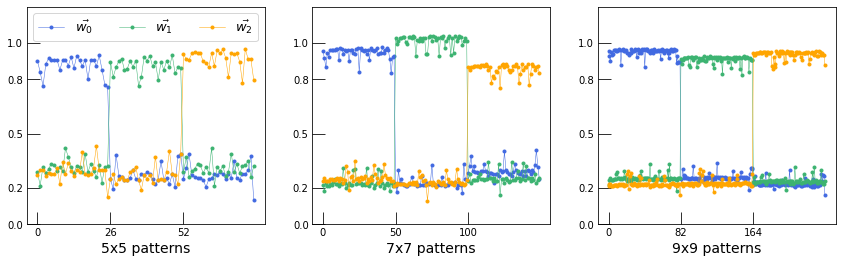

In [72]:
# demo example, for Fig 6b

ymax=1.2

fig=plt.figure(figsize=(14.5,4))
#=======
ax=fig.add_subplot(131)

line0,=ax.plot(np.arange(0,len(output_w0_ct_5x5_0)),output_w0_ct_5x5_0,marker='.',lw=0.5,color='royalblue',label='$\\vec{w_0}$')
line1,=ax.plot(np.arange(0,len(output_w1_ct_5x5_0)),output_w1_ct_5x5_0,marker='.',lw=0.5,color='mediumseagreen',label='$\\vec{w_1}$')
line2,=ax.plot(np.arange(0,len(output_w2_ct_5x5_0)),output_w2_ct_5x5_0,marker='.',lw=0.5,color='orange',label='$\\vec{w_2}$')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('5x5 patterns',fontsize=14)
ax.legend(loc='upper left',ncol=3,fontsize=13)
ax.set_xticks([0,26,52])
#=======
ax=fig.add_subplot(132)

ax.plot(np.arange(0,len(output_w0_ct_7x7_0)),output_w0_ct_7x7_0,marker='.',lw=0.5,color='royalblue')
ax.plot(np.arange(0,len(output_w1_ct_7x7_0)),output_w1_ct_7x7_0,marker='.',lw=0.5,color='mediumseagreen')
ax.plot(np.arange(0,len(output_w2_ct_7x7_0)),output_w2_ct_7x7_0,marker='.',lw=0.5,color='orange')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('7x7 patterns',fontsize=14)
ax.set_xticks([0,50,100])



#=======
ax=fig.add_subplot(133)

ax.plot(np.arange(0,len(output_w0_ct_9x9_0)),output_w0_ct_9x9_0,marker='.',lw=0.5,color='royalblue')
ax.plot(np.arange(0,len(output_w1_ct_9x9_0)),output_w1_ct_9x9_0,marker='.',lw=0.5,color='mediumseagreen')
ax.plot(np.arange(0,len(output_w2_ct_9x9_0)),output_w2_ct_9x9_0,marker='.',lw=0.5,color='orange')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('9x9 patterns',fontsize=14)
ax.set_xticks([0,82,164])
